# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the clean dataset through univariate & multivariate analysis 
- Investigate correlations between features
- Extract relevant insights to determine steps for feature engineering

In [140]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [85]:
event_df = pl.read_csv("../data/events.csv")
category_tree_df = pl.read_csv("../data/category_tree.csv")
items_df = pl.read_csv("../data/item_properties.csv")

In [86]:
event_df.head()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1433221332117,257597,"""view""",355908,null
1433224214164,992329,"""view""",248676,null
1433221999827,111016,"""view""",318965,null
1433221955914,483717,"""view""",253185,null
1433221337106,951259,"""view""",367447,null


In [87]:
# Unique visitors 
print("Unique visitors:")
print(event_df.select(pl.col('visitorid').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 1407580   │
└───────────┘


In [88]:
# Total visitors 
print("Total visitors:")
print(event_df.select(pl.col('visitorid').len()))

Total visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 2756101   │
└───────────┘


In [89]:
df_count = event_df["event"].value_counts(sort=True)
df_count

event,count
str,u32
"""view""",2664312
"""addtocart""",69332
"""transaction""",22457


In [90]:
# Total transactions 
print("Number of transactions: ",df_count['count'][-1])

# Percent of transactions vs all other events 
print("Percent of transactions:",round((df_count['count'][-1] / df_count['count'].sum())*100,3))

Number of transactions:  22457
Percent of transactions: 0.815


In [91]:
category_tree_df

categoryid,parentid
i64,i64
1016,213
809,169
570,9
1691,885
536,1691
…,…
49,1125
1112,630
1336,745


### Univariate Analysis 

In [96]:
event_df

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1433221332117,257597,"""view""",355908,null
1433224214164,992329,"""view""",248676,null
1433221999827,111016,"""view""",318965,null
1433221955914,483717,"""view""",253185,null
1433221337106,951259,"""view""",367447,null
…,…,…,…,…
1438398785939,591435,"""view""",261427,null
1438399813142,762376,"""view""",115946,null
1438397820527,1251746,"""view""",78144,null


### Multivariate Analysis 

In [123]:
grouped_df = event_df.group_by(pl.col('event')).agg(pl.col('itemid'))
grouped_df

event,itemid
str,list[i64]
"""transaction""","[356475, 15335, … 312728]"
"""view""","[355908, 248676, … 152913]"
"""addtocart""","[5206, 10572, … 346534]"


In [147]:
most_popular_bought_item = Counter(grouped_df.row(0)[1])
most_popular_bought_item

Counter({461686: 133,
         119736: 97,
         213834: 92,
         7943: 46,
         312728: 46,
         445351: 45,
         48030: 41,
         420960: 38,
         248455: 38,
         17478: 37,
         409804: 35,
         320130: 33,
         416017: 32,
         46156: 31,
         369447: 31,
         268883: 29,
         334401: 28,
         257040: 27,
         441852: 27,
         9877: 25,
         37029: 25,
         318333: 23,
         546: 23,
         450082: 22,
         138427: 20,
         190000: 20,
         222888: 20,
         10572: 19,
         369158: 19,
         217605: 19,
         46232: 19,
         382885: 19,
         29196: 19,
         417927: 18,
         301721: 18,
         379520: 17,
         369933: 17,
         288525: 16,
         234255: 16,
         92466: 16,
         42002: 16,
         448453: 16,
         23762: 15,
         444190: 15,
         170262: 15,
         309778: 15,
         384302: 15,
         132683: 15,
        

In [ ]:
most_popular_cart_item = Counter(grouped_df.row(2)[1])
most_popular_cart_item

In [143]:
most_popular_viewed_item = Counter(grouped_df.row(1)[1])
most_popular_viewed_item

0

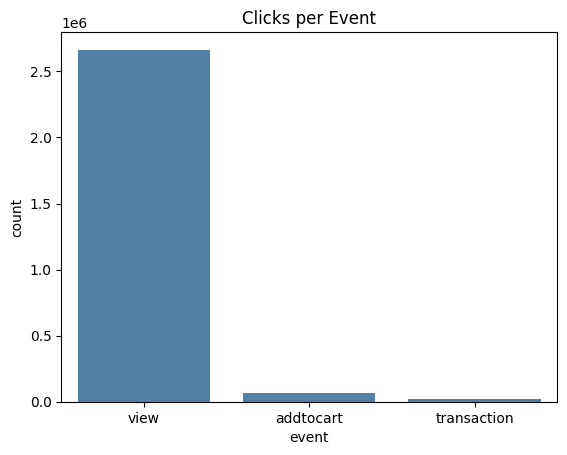

In [82]:
sns.barplot(
    y=df_count['count'],
    x=df_count['event'], 
    color='steelblue'
)
plt.title("Clicks per Event")
plt.show()

In [23]:
purchase_df = event_df.filter(pl.col('event') == 'transaction')
purchase_df.tail()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1438377176570,1050575,"""transaction""",31640,"""8354"""
1438379878779,861299,"""transaction""",456602,"""3643"""
1438357730123,855941,"""transaction""",235771,"""4385"""
1438355560300,548772,"""transaction""",29167,"""13872"""
1438358989163,1051054,"""transaction""",312728,"""17579"""
